# Lab #3: Asking a statistical question
Add header

In [67]:
%matplotlib inline
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import scipy
from scipy import stats
import astropy.units as u

## Problem 1
Add Description
## 1. A)

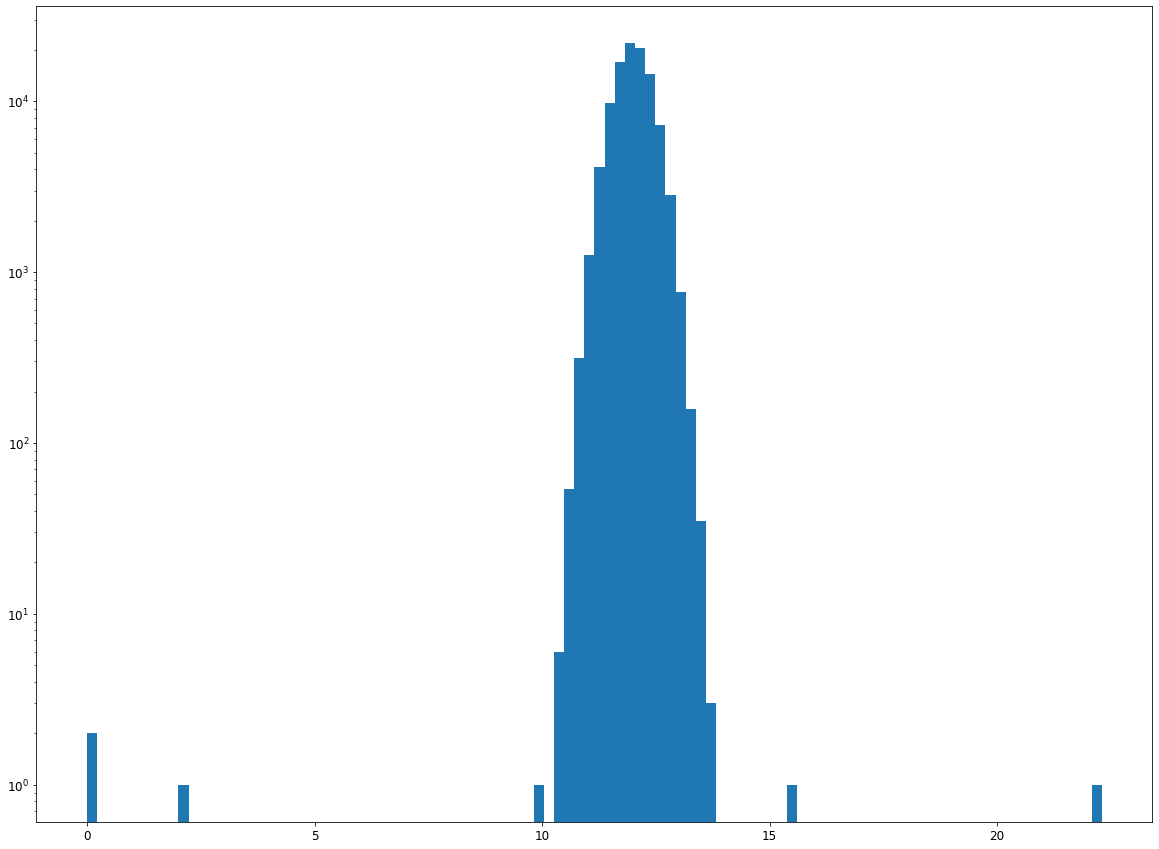

In [112]:
d = np.append(stats.norm.rvs(loc = 12., scale = 0.4, size = 100000), [10., 10.3, 2.1, 0., 0., 15.6, 22.3, 12.7])
fig, ax = plt.subplots(1, 1,figsize=(20,15))
plt.tick_params(labelsize = 12)
plt.yscale('log')
ax.hist(d,100);
#Label this plot

#### Fix this *below possibly*
My statistical question is, What is the chance that my Test with a certain sigma threshold will identify True Good values as good data and True Bad values as bad data?

The math involved is that I find the location of a 5-sigma event on both of the ends of the distribution and set those as my search limits. Thus my test will say that values within this 5-sigma threshold are good and values outside are bad. I generate the 5-sigma probability from a Standard Normal Distribution and then converted to a location value using a ppf with the parameters of the distribution.

In [116]:
def test(sigma):
    bad=0
    good=0
    fp=0
    fn=0
    ba=[]
    bv=[10., 10.3, 2.1, 0., 0., 15.6, 22.3, 12.7]
    siggy5=1-stats.norm.cdf(sigma)
    mi=stats.norm.ppf(siggy5,loc=12,scale=0.4)
    ma=stats.norm.ppf(1-siggy5,loc=12,scale=0.4)
    for i in range(len(d)):
        if d[i]<mi or d[i]>ma:
            bad+=1
            ba.append(d[i])
        else:
            good+=1
    for j in range(len(bv)):
        if bv[j]<mi or bv[j]>ma:
            fp+=1
        else:
            fn+=1
    print("Good Values = ",good)
    print("Bad Values  = ",bad)
    print("Bad True = ",fn)
    print('Bad Bad = ',fp)

In [117]:
test(5)

Good Values =  100002
Bad Values  =  6
Bad True =  2
Bad Bad =  6


|              | True T | Bad T |
|-------------:|-------:|------:|
| My Test Good |     100000 |     2 |
|  My Test Bad |      0 |    6 |

## 1. B)
We can see that when we use a 4-sigma threshold, that we have identified more false negatives in the True T / My Test Bad, than before. It has identified more bad values than originally added thus, we have false negatives. 

In [119]:
test(4)

Good Values =  99993
Bad Values  =  15
Bad True =  1
Bad Bad =  7


|              | True T | Bad T |
|-------------:|-------:|------:|
| My Test Good | 99993  |     1 |
|  My Test Bad |      7 |     7 |


## 1. C) 
There are some mistakes of commission in this test. The data points that exist inside the original distribution like the value, 12.7, we see that it may be hard to identify this value as bad since it is so close to the mean. Furthermore, the distribution creation is done randomly each time it is called thus the values close to the mean are not truly uniform and vary by some shape, most likely more than one datapoint. This means that due to the distributions randomness we will most likely never find this datapoint.

---
## Problem 2
Add Description

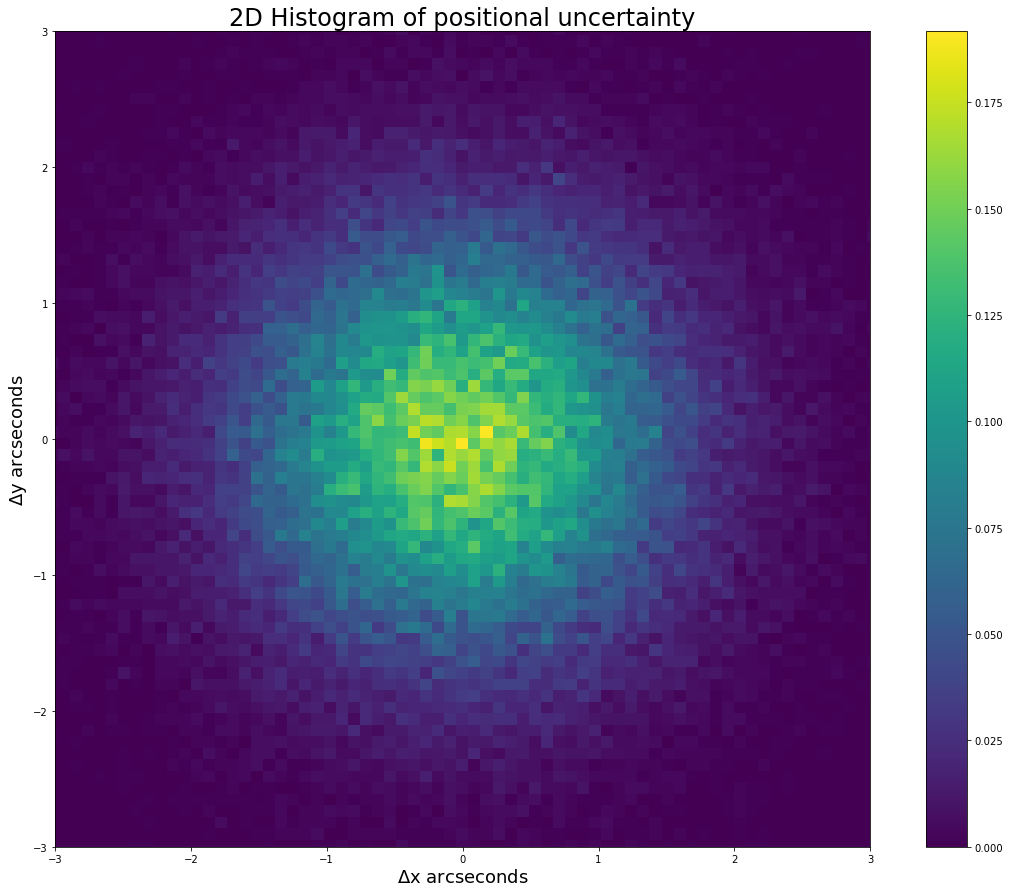

In [36]:
a = np.vstack((stats.norm.rvs( scale = 1, size = 100000), stats.norm.rvs( scale = 1, size = 100000)))
a.shape
fig, ax = plt.subplots(1, 1,figsize=(20,15))
h = ax.hist2d(a[0,:],a[1,:],bins=100, density=True);
ax.set_aspect('equal', 'box')
ax.set_xlim([-3 , 3])
ax.set_ylim([-3 , 3])
ax.set_title("2D Histogram of positional uncertainty", fontsize = 24)
ax.set_ylabel("$\Delta$y arcseconds", fontsize = 18)
ax.set_xlabel("$\Delta$x arcseconds", fontsize = 18)
fig.colorbar(h[3], ax=ax);

1. My question is, what is the distance a signal asteroid must travel in order to be considered an asteroid?

2. We can describe the probability distribution in terms of the radius away from the center mean value. With the two distributions we can say each normal random vector is $X$ and $Y$ in which we can write the distance away from the origin as $\sqrt{X^2 + Y^2}$ which is the norm of the distribution vector. We know that this norm is related to the pdf of a chi distribution of 2 degrees of freedom $ \chi _{2}$ since it is a two dimensional vector. This specific chi distribution relates to a Rayleigh distribution of $\sigma=1$, thus we can use a Rayleigh ppf to find the distance travelled for a 5-sigma event.

3. *See Below*

In [90]:
stats.rayleigh.ppf(1-siggy5)

5.489079776034238

## Problem 3

This is Poisson Distribution and if we look at the 15 days we observed, since the cosmic ray rate for this region is 1 ray/min we must multiply to get it to hours and then multiply it by the 8 hours of observations, and then multiply it by the 15 days we observed to get the cosmic ray rate for 15 days of observations. This comes out to 7200 observations, we can set this as the rate for our Poisson distribution. Then, we can find the probability using the cdf function to find if the measurement of 6800 rays over this observation period is significant.

My statistical question is, What is the probability of our data being signal free? (Moon Blocking) Math above^

In [77]:
60*8*15

7200

In [94]:
rate=7200
pr=stats.poisson.cdf(6800,mu=7200)
stats.norm.ppf(pr)

-4.750747965777188

We find that the observation of 6800 gamma rays is too common for this to be signal free background since it is very close to the mean, it is taking up a lot of area on the Normal distribution, which means that this is too probable and that this is not background data.